In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [ ]:
# Load the mushrooms dataset
df = pd.read_excel("mushrooms.xlsx")
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [ ]:
# check the data types of the columns
print("\nData types of columns:\n", df.dtypes)


Data types of columns:
 class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object


In [ ]:
# compute summary statistics for the numeric columns
print("\nSummary statistics for numeric columns:\n", df.describe())



Summary statistics for numeric columns:
        class cap-shape cap-surface cap-color bruises  odor gill-attachment  \
count   8124      8124        8124      8124    8124  8124            8124   
unique     2         6           4        10       2     9               2   
top        e         x           y         n       f     n               f   
freq    4208      3656        3244      2284    4748  3528            7914   

       gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
count          8124      8124       8124  ...                     8124   
unique            2         2         12  ...                        4   
top               c         b          b  ...                        s   
freq           6812      5612       1728  ...                     4936   

       stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
count                    8124                   8124      8124       8124   
unique                      9             


Column name: class
e    4208
p    3916
Name: class, dtype: int64

Column name: cap-shape
x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64

Column name: cap-surface
y    3244
s    2556
f    2320
g       4
Name: cap-surface, dtype: int64

Column name: cap-color
n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: cap-color, dtype: int64

Column name: bruises
f    4748
t    3376
Name: bruises, dtype: int64

Column name: odor
n    3528
f    2160
y     576
s     576
a     400
l     400
p     256
c     192
m      36
Name: odor, dtype: int64

Column name: gill-attachment
f    7914
a     210
Name: gill-attachment, dtype: int64

Column name: gill-spacing
c    6812
w    1312
Name: gill-spacing, dtype: int64

Column name: gill-size
b    5612
n    2512
Name: gill-size, dtype: int64

Column name: gill-color
b    1728
p    1492
w    1202
n    1048
g     752
h     732
u     492
k     408
e      96
y      86

In [ ]:
# Display the first five rows of the dataset
print(df.head())

  class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         p          w   
1       

In [ ]:
# Check for missing values
print(df.isnull().sum())

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64


In [ ]:
# Check the data types of the columns
print(df.dtypes)

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object


In [ ]:
# Summary statistics of the dataset
print(df.describe())

       class cap-shape cap-surface cap-color bruises  odor gill-attachment  \
count   8124      8124        8124      8124    8124  8124            8124   
unique     2         6           4        10       2     9               2   
top        e         x           y         n       f     n               f   
freq    4208      3656        3244      2284    4748  3528            7914   

       gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
count          8124      8124       8124  ...                     8124   
unique            2         2         12  ...                        4   
top               c         b          b  ...                        s   
freq           6812      5612       1728  ...                     4936   

       stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
count                    8124                   8124      8124       8124   
unique                      9                      9         1          4   
top    

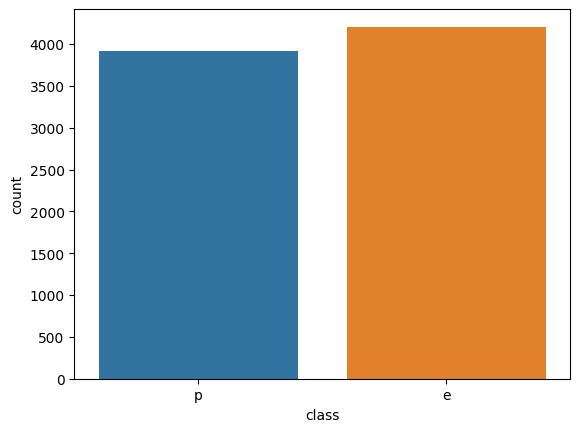

In [ ]:
# Visualize the target variable distribution
sns.countplot(x='class', data=df)
plt.show()

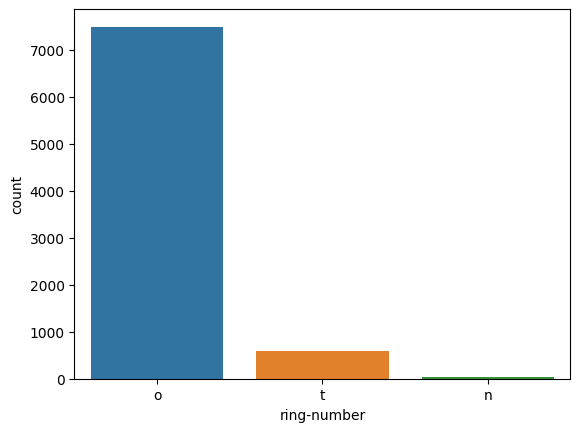

In [ ]:
# Visualize the target variable distribution
sns.countplot(x='ring-number', data=df)
plt.show()

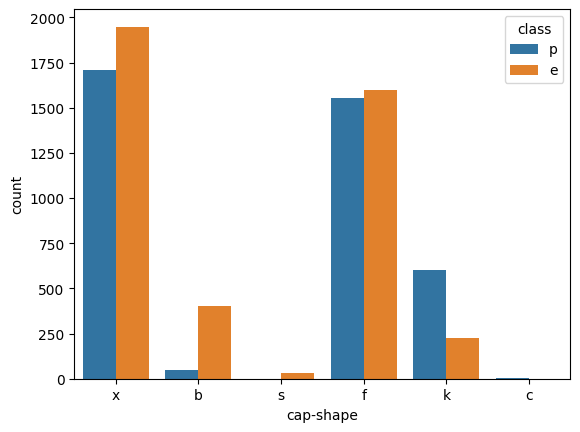

In [ ]:
# Visualize the relationship between target variable and cap shape
sns.countplot(x='cap-shape', hue='class', data=df)
plt.show()


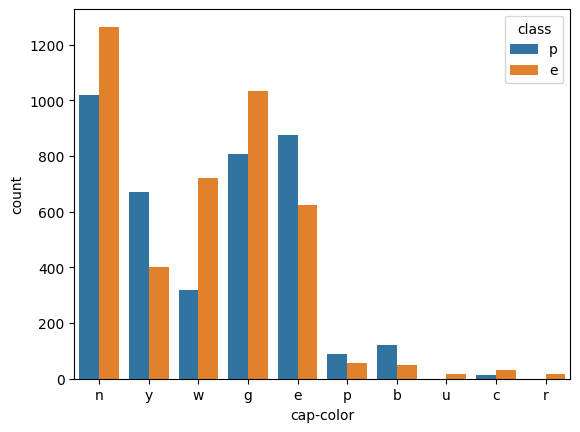

In [ ]:
# Visualize the relationship between target variable and cap color
sns.countplot(x='cap-color', hue='class', data=df)
plt.show()

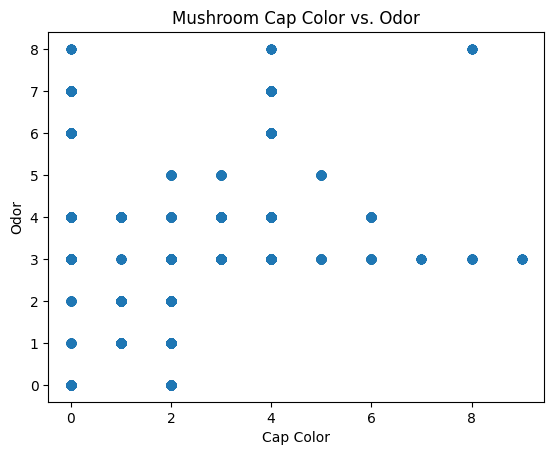

In [ ]:
# Create a scatter plot of cap-color vs. odor
plt.scatter(df['cap-color'], df['odor'])

# Add labels and title
plt.xlabel('Cap Color')
plt.ylabel('Odor')
plt.title('Mushroom Cap Color vs. Odor')

# Show the plot
plt.show()

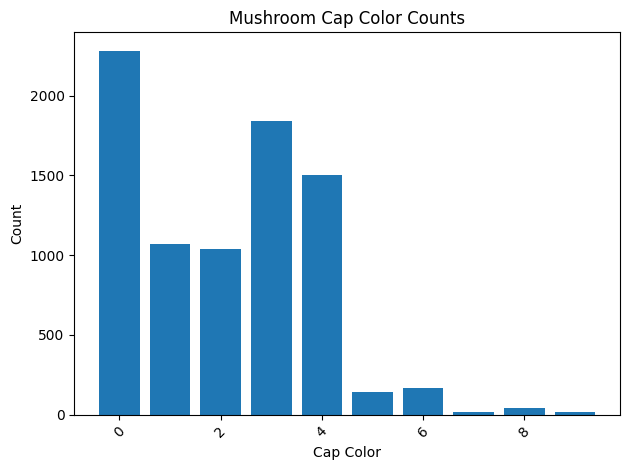

In [ ]:
# Count the number of mushrooms for each cap color
counts = df['cap-color'].value_counts()

# Create a bar chart of the counts
plt.bar(counts.index, counts.values)

# Add labels and title
plt.xlabel('Cap Color')
plt.ylabel('Count')
plt.title('Mushroom Cap Color Counts')

# Customize the appearance of the chart
plt.xticks(rotation=45)
plt.tight_layout()

# Show the chart
plt.show()

In [ ]:
# Convert categorical features to numerical labels
for column in df.columns:
    df[column] = pd.factorize(df[column])[0]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop("class", axis=1), df["class"], test_size=0.2, random_state=42)

# Train a decision tree classifier on the training data
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict the class labels of the testing set
y_pred = clf.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.3f}")

Accuracy: 1.000


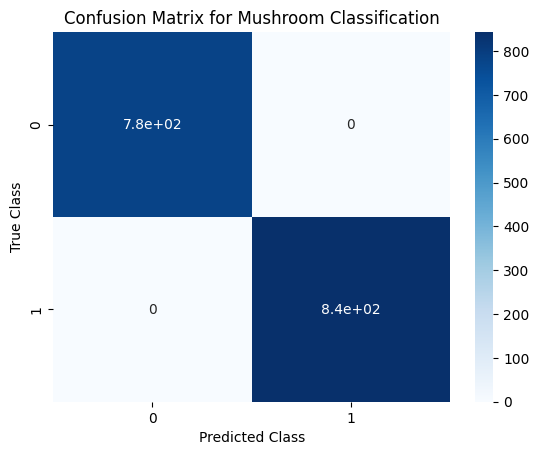

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
# Generate confusion matrix for the test set
cm = confusion_matrix(y_test, y_pred)

# Create heatmap of the confusion matrix
sns.heatmap(cm, annot=True, cmap="Blues")

# Add labels and title
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.title("Confusion Matrix for Mushroom Classification")

# Show the plot
plt.show()

In [ ]:
# Convert categorical features to numerical labels
for column in df.columns:
    df[column] = pd.factorize(df[column])[0]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop("class", axis=1), df["class"], test_size=0.2, random_state=42)

# Train a decision tree classifier on the training data
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict the class labels of the testing set
y_pred = clf.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
score = clf.score(X_test, y_test)
print(f"Accuracy: {score:.3f}")
print(f"Accuracy: {accuracy:.3f}")

Accuracy: 1.000
Accuracy: 1.000


[Text(0.6363636363636364, 0.9375, 'odor <= 3.5\ngini = 0.499\nsamples = 6499\nvalue = [3134, 3365]'),
 Text(0.5454545454545454, 0.8125, 'odor <= 0.5\ngini = 0.148\nsamples = 3659\nvalue = [294, 3365]'),
 Text(0.45454545454545453, 0.6875, 'gini = 0.0\nsamples = 199\nvalue = [199, 0]'),
 Text(0.6363636363636364, 0.6875, 'spore-print-color <= 4.5\ngini = 0.053\nsamples = 3460\nvalue = [95, 3365]'),
 Text(0.45454545454545453, 0.5625, 'stalk-color-above-ring <= 7.0\ngini = 0.022\nsamples = 3288\nvalue = [37, 3251]'),
 Text(0.36363636363636365, 0.4375, 'gill-size <= 0.5\ngini = 0.018\nsamples = 3281\nvalue = [30, 3251]'),
 Text(0.2727272727272727, 0.3125, 'stalk-surface-below-ring <= 1.5\ngini = 0.216\nsamples = 244\nvalue = [30, 214]'),
 Text(0.18181818181818182, 0.1875, 'population <= 4.5\ngini = 0.061\nsamples = 221\nvalue = [7, 214]'),
 Text(0.09090909090909091, 0.0625, 'gini = 0.0\nsamples = 214\nvalue = [0, 214]'),
 Text(0.2727272727272727, 0.0625, 'gini = 0.0\nsamples = 7\nvalue = [7,

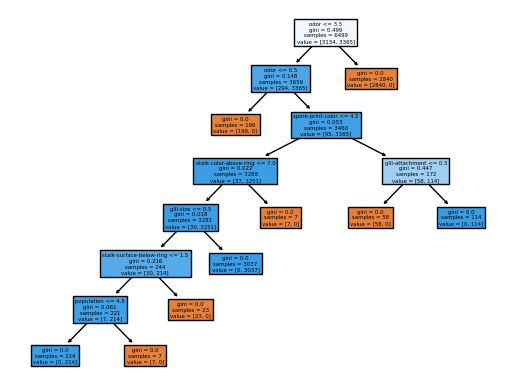

In [ ]:
# Convert categorical features to numerical labels
for column in df.columns:
    df[column] = pd.factorize(df[column])[0]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop("class", axis=1), df["class"], test_size=0.2, random_state=42)


# Train a decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
# Predict the class labels of the testing set
y_pred = clf.predict(X_test)

# Visualize the decision tree
plot_tree(clf, filled=True, feature_names=X_train.columns)

[Text(0.6923076923076923, 0.95, 'odor <= 3.5\ngini = 0.499\nsamples = 8124\nvalue = [3916, 4208]'),
 Text(0.6153846153846154, 0.85, 'odor <= 0.5\ngini = 0.151\nsamples = 4584\nvalue = [376, 4208]'),
 Text(0.5384615384615384, 0.75, 'gini = 0.0\nsamples = 256\nvalue = [256, 0]'),
 Text(0.6923076923076923, 0.75, 'spore-print-color <= 4.5\ngini = 0.054\nsamples = 4328\nvalue = [120, 4208]'),
 Text(0.5384615384615384, 0.65, 'stalk-color-above-ring <= 7.0\ngini = 0.023\nsamples = 4112\nvalue = [48, 4064]'),
 Text(0.46153846153846156, 0.55, 'stalk-surface-above-ring <= 1.5\ngini = 0.019\nsamples = 4104\nvalue = [40, 4064]'),
 Text(0.3076923076923077, 0.45, 'cap-surface <= 2.5\ngini = 0.004\nsamples = 3912\nvalue = [8, 3904]'),
 Text(0.23076923076923078, 0.35, 'cap-shape <= 4.5\ngini = 0.002\nsamples = 3908\nvalue = [4, 3904]'),
 Text(0.15384615384615385, 0.25, 'habitat <= 5.5\ngini = 0.002\nsamples = 3907\nvalue = [3, 3904]'),
 Text(0.07692307692307693, 0.15, 'gini = 0.0\nsamples = 3808\nvalu

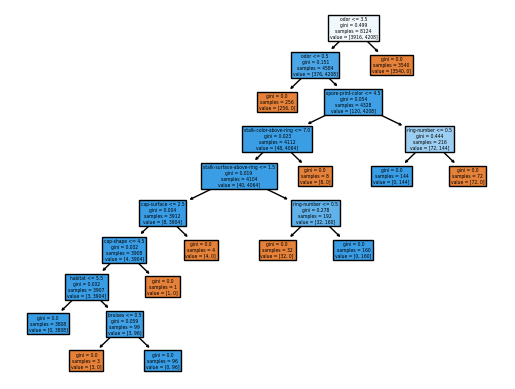

In [ ]:
# Convert categorical features to numerical labels
for column in df.columns:
    df[column] = pd.factorize(df[column])[0]

# Split the dataset into features and target variable
X = df.drop("class", axis=1)
y = df["class"]

# Train a decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X, y)

# Visualize the decision tree
plot_tree(clf, filled=True, feature_names=X.columns)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

train_score = clf.score(X_train, y_train)
val_score = clf.score(X_val, y_val)

print(f"Training accuracy: {train_score:.3f}")
print(f"Validation accuracy: {val_score:.3f}")

Training accuracy: 1.000
Validation accuracy: 1.000


In [ ]:
from sklearn.linear_model import LogisticRegression
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regression object
clf = LogisticRegression(random_state=42)

# Train the model on the training set
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the performance of the model
score = clf.score(X_test, y_test)
print(f"Accuracy: {score:.3f}")

Accuracy: 0.982


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
